# Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [43]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import string
import warnings
warnings.filterwarnings("ignore")

In [44]:
# Load the data set
tweet = pd.read_csv('Elon_musk.csv',encoding='cp1252')
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [45]:
# Drop the unnecessary columns
tweet.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweet

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [46]:
tweet.shape

(1999, 1)

In [47]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


# Exploring the data

# Visualize the top 10 tags 

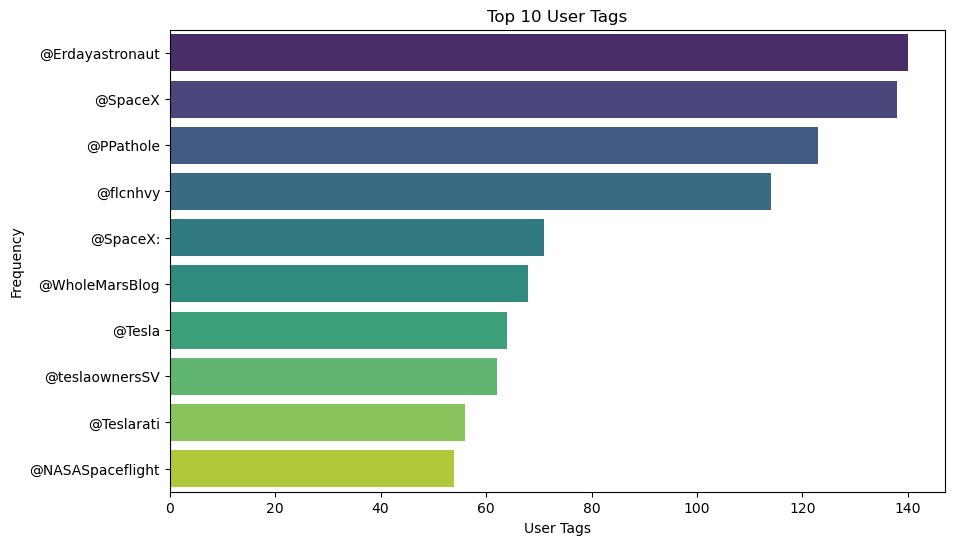

In [48]:
# Identify top user tags
def extract_user_tags(text):
    return [word for word in text.split() if word.startswith('@')]

tweet['UserTags'] = tweet['Text'].apply(extract_user_tags)
user_tags = [tag for tags in tweet['UserTags'] for tag in tags]
tag_freq = pd.Series(user_tags).value_counts()

#top 10 user tags
top_user_tags = tag_freq.head(10)

# Plot the top 10 user tags

plt.figure(figsize=(10, 6))
sns.barplot(y=top_user_tags.index, x=top_user_tags.values, palette="viridis")
plt.title('Top 10 User Tags')
plt.xlabel('User Tags')
plt.ylabel('Frequency')
plt.show()

# Text preprocessing

In [52]:
tweet.drop('UserTags',axis = 1, inplace = True)

In [53]:
tweet.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [56]:
# Create a list of sentences from a data frame
sentenses = tweet['Text'].tolist() # here df['text'] is a pandas series
sentenses[:5]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [57]:
sentenses = [a.strip() for a in sentenses] # list comprehension
sentenses[:5]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [58]:
# remove empty strings
sentenses = [a for a in sentenses if len(a)>0]

In [59]:
# join all the sentences into one string
text = ' '.join(sentenses)

In [60]:
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [61]:
# remove all punctuations from the text
rem_punc_text = text.translate(str.maketrans('' , '',string.punctuation))

In [62]:
rem_punc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [63]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(rem_punc_text)
tokens = [token.text for token in doc]
tokens[:10]

['kunalb11',
 'I',
 '’m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk']

In [64]:
# Create stop words list
stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [65]:
tokens = [token for token in tokens if token not in stopwords]
tokens[:10]

['kunalb11',
 'I',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have']

In [66]:
# Converting all tokens to lower case
tokens = [token.lower() for token in tokens]
tokens[:10]

['kunalb11',
 'i',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have']

In [67]:
# Reducing the words in doc to their root form
lemma = [token.lemma_ for token in doc]
lemma[:10]

['kunalb11',
 'I',
 '’m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'trace',
 'on',
 'Cyberpunk']

In [68]:
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X =cv.fit_transform(lemma)

In [69]:
cv.vocabulary_

{'kunalb11': 2707,
 'an': 267,
 'alien': 231,
 'idaacarmack': 2444,
 'ray': 3621,
 'trace': 4500,
 'on': 3248,
 'cyberpunk': 965,
 'with': 4895,
 'hdr': 1680,
 'be': 469,
 'nextlevel': 3156,
 'have': 1674,
 'you': 4947,
 'try': 4534,
 'it': 2576,
 'joerogan': 2627,
 'spotify': 4116,
 'great': 1614,
 'interview': 2554,
 'gtera27': 1633,
 'doge': 1116,
 'underestimate': 4666,
 'teslacn': 4342,
 'congratulations': 861,
 'tesla': 4336,
 'china': 744,
 'for': 1462,
 'amazing': 257,
 'execution': 1328,
 'last': 2727,
 'year': 4939,
 'now': 3196,
 'to': 4459,
 'the': 4388,
 'next': 3155,
 'even': 1300,
 'more': 3064,
 'happy': 1661,
 'new': 3152,
 'of': 3232,
 'ox': 3315,
 'httpstco9wfkmyu2oj': 1870,
 'frodo': 1499,
 'underdoge': 4665,
 'all': 234,
 'think': 4416,
 'he': 1681,
 'would': 4914,
 'fail': 1364,
 'himself': 1726,
 'most': 3069,
 'httpstcozgxjfdzzrm': 2403,
 'owensparks': 3311,
 'flcnhvy': 1441,
 'anonyx10': 286,
 'haha': 1647,
 'thanks': 4381,
 'indeed': 2493,
 'tweets': 4556,
 'd

In [70]:
# Convert the vocabulary to a data frame
pd.DataFrame(cv.vocabulary_,index = [0]).T

,0
kunalb11,2707
an,267
alien,231
idaacarmack,2444
ray,3621
...,...
httpstcowjrzibkh1h,2335
click,778
samwise,3821
gamgee,1535


In [71]:
pd.DataFrame(cv.vocabulary_,index = [0]).T.sort_values(by = 0 ,ascending =False)

,0
ðogecoin,4971
zzcool,4970
zwiebelbach,4969
zubinanary,4968
zshauladventure,4967
...,...
10000,4
1000,3
100,2
10,1


In [76]:
# Include bigram and trigram in addition to unigram and limited the features to 100
cv_ngram = CountVectorizer(ngram_range=(1,3),max_features=1000)
bow_ngram_cv = cv_ngram.fit_transform(lemma)

In [77]:
bow_ngram_cv

<22084x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 15507 stored elements in Compressed Sparse Row format>

In [78]:
# Display the bow as an array (Bag of words)
bow_ngram_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
cv_ngram.get_feature_names_out()

array(['10', '100', '11', '13', '15', '20', '2020', '28delayslater', '30',
       '300', '330', '40', '4d', '50', '60', 'able', 'about', 'above',
       'absolutely', 'access', 'accurate', 'achieve', 'actually',
       'adamklotz', 'add', 'after', 'again', 'ago', 'agree', 'agreed',
       'ahead', 'ai', 'aim', 'air', 'ajtourville', 'alexavoigt', 'all',
       'allow', 'almost', 'already', 'also', 'although', 'always',
       'amazing', 'amount', 'amp', 'an', 'analysis', 'and', 'another',
       'any', 'appear', 'apply', 'appreciate', 'approval', 'archillect',
       'architecture', 'arm', 'around', 'arstechnica', 'article', 'as',
       'ask', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut',
       'astronomiaum', 'at', 'attack', 'august', 'austin',
       'austinbarnard45', 'austinteslaclub', 'australia', 'automatically',
       'autopilot', 'autopilotai', 'average', 'away', 'awesome', 'back',
       'background', 'bad', 'bar', 'base', 'battery', 'bay',
       'bbcsciencenews',

In [80]:
df_cv_1000 = pd.DataFrame(bow_ngram_cv.toarray(),columns =cv_ngram.get_feature_names_out())

In [81]:
df_cv_1000

,10,100,11,13,15,20,2020,28delayslater,30,300,...,write,yeah,year,yes,yesterday,yet,you,your,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df_cv_1000.sort_values(by = 'yeah',ascending=False)

,10,100,11,13,15,20,2020,28delayslater,30,300,...,write,yeah,year,yes,yesterday,yet,you,your,yup,zero
15400,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1446,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11600,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4805,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16474,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# TF_IDF vectorizer with upto tri grams and max features = 1000
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(norm = 'l2',ngram_range=(1,3),max_features=1000)

In [84]:
tfidf_matrix = tf_idf.fit_transform(lemma)

In [85]:
tfidf_matrix

<22084x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 15507 stored elements in Compressed Sparse Row format>

In [86]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns = tf_idf.get_feature_names_out())

In [88]:
df_tfidf.head()

,10,100,11,13,15,20,2020,28delayslater,30,300,...,write,yeah,year,yes,yesterday,yet,you,your,yup,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df_tfidf.sort_values(by = 'yeah',ascending = False)

,10,100,11,13,15,20,2020,28delayslater,30,300,...,write,yeah,year,yes,yesterday,yet,you,your,yup,zero
15400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Generate a world cloud

In [91]:
from wordcloud import WordCloud

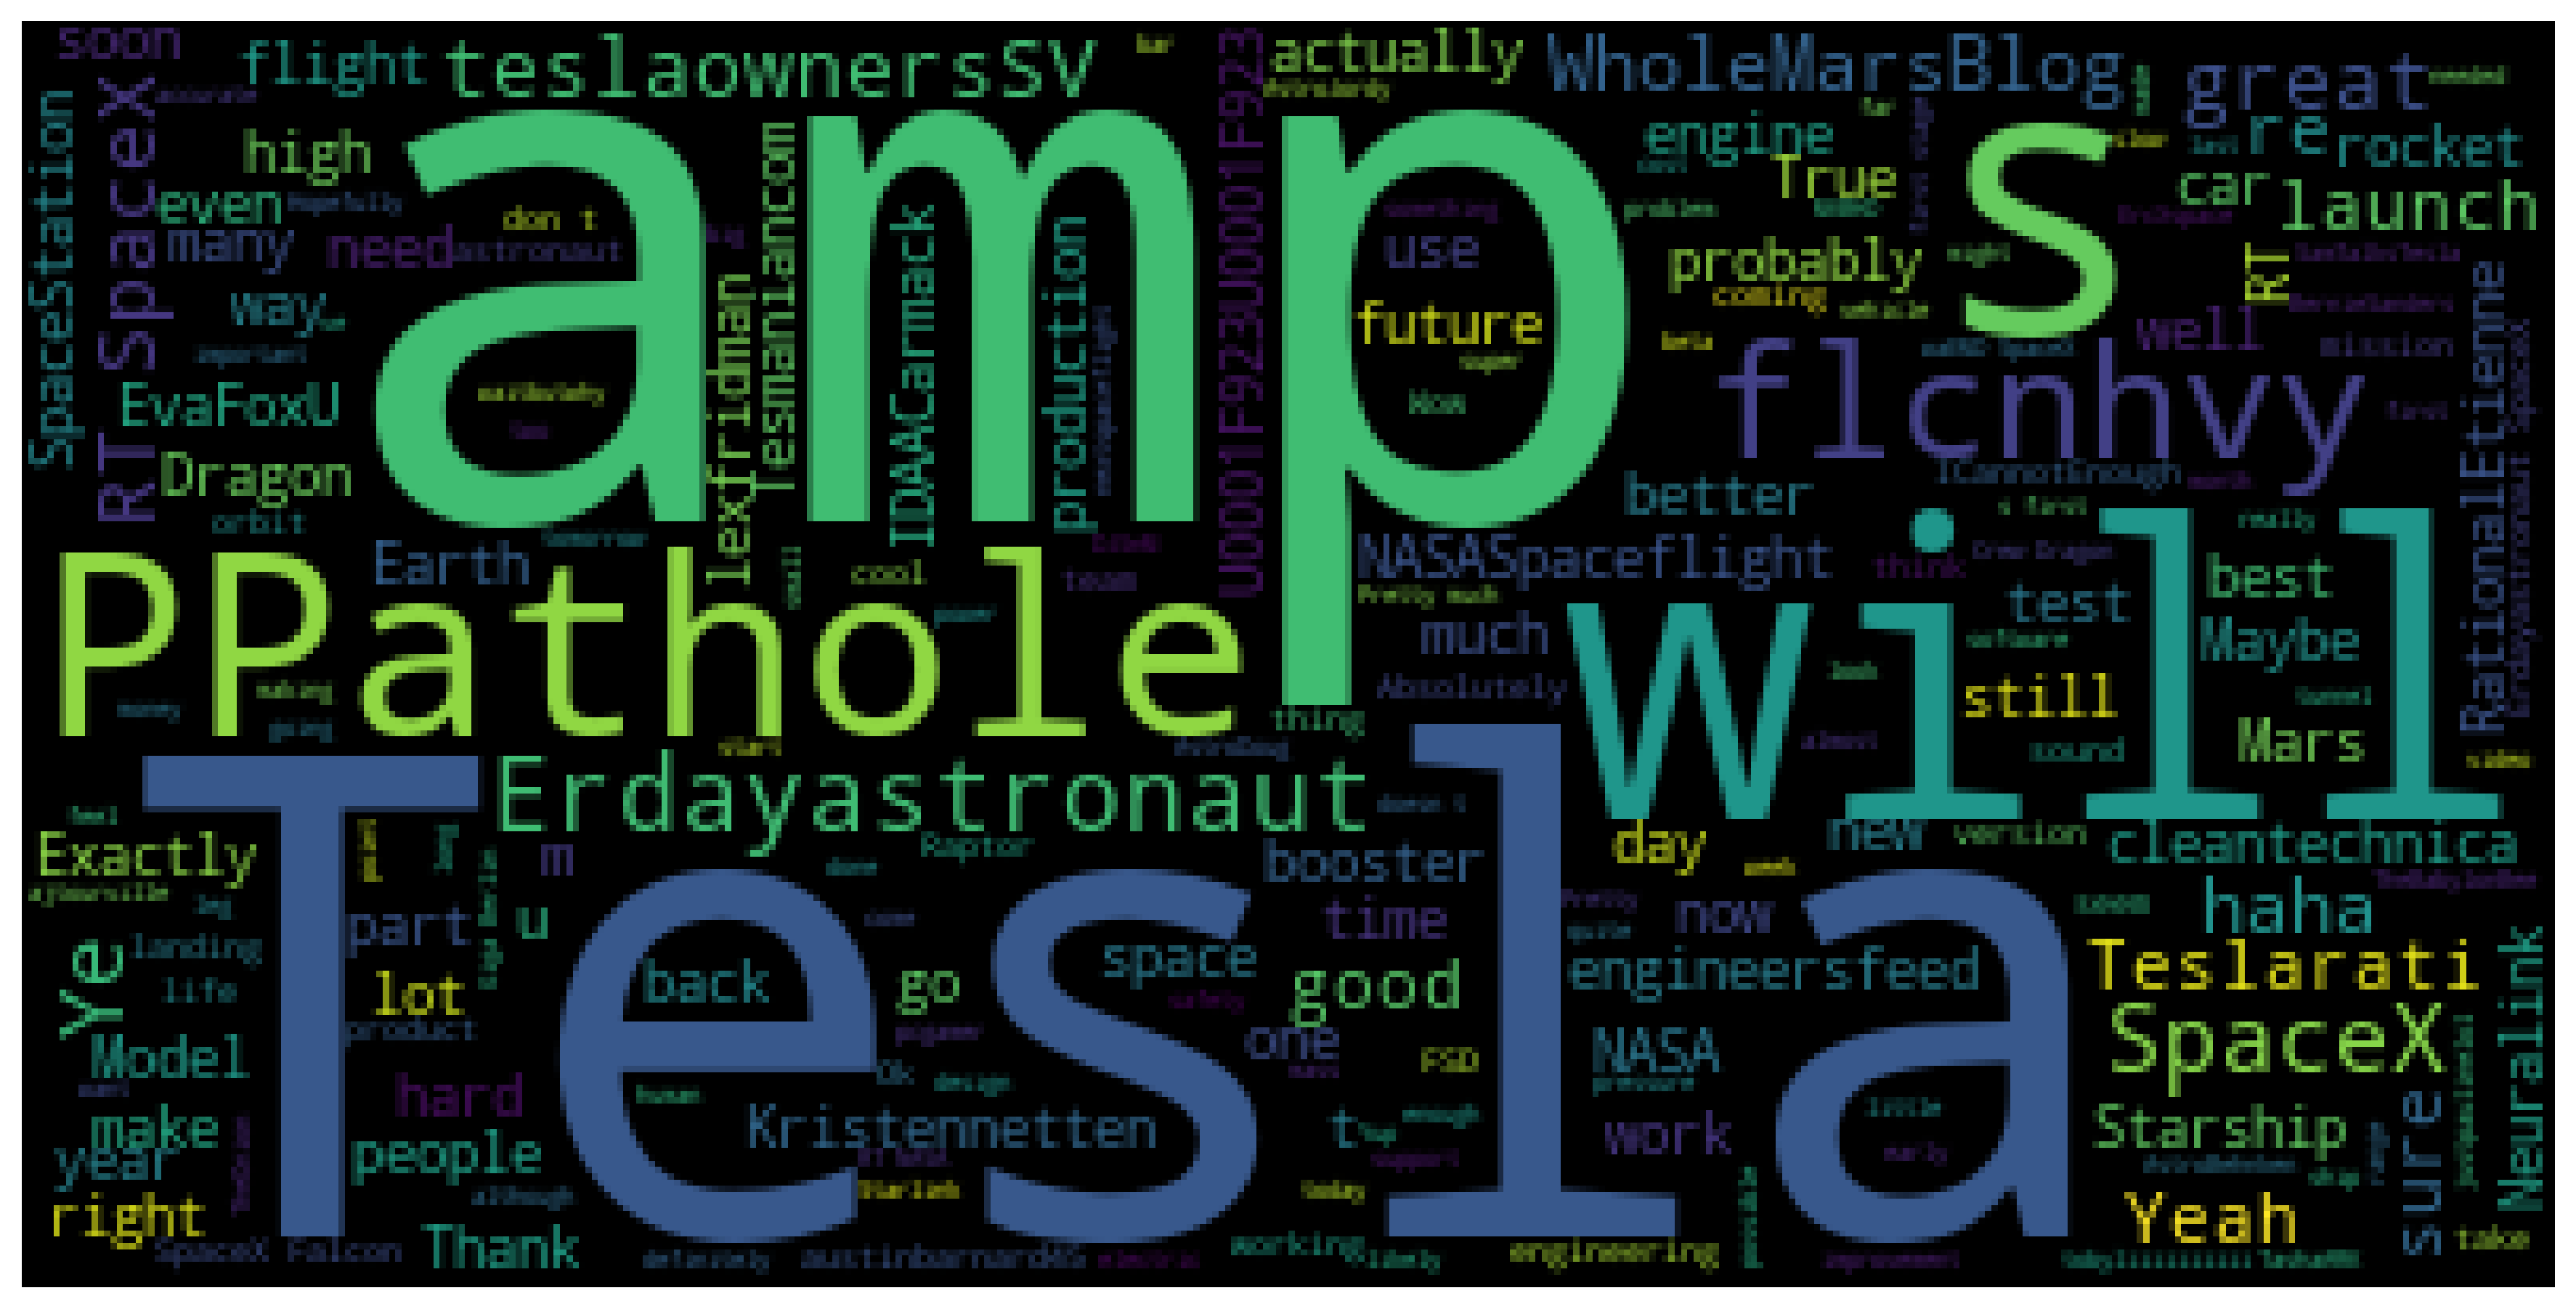

In [92]:
plt.figure(figsize=(15,15),dpi = 300)
wordcloud1 = WordCloud().generate(rem_punc_text)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show();

In [93]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweet[["subjectivity", "polarity"]] = tweet.apply(sentiment_analysis, axis=1)
tweet.head()

,Text,subjectivity,polarity
0,@kunalb11 I’m an alien,0.750000,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,0.000000
2,@joerogan @Spotify Great interview!,0.750000,1.000000
3,@gtera27 Doge is underestimated,0.000000,0.000000
4,@teslacn Congratulations Tesla China for amazi...,0.366667,0.345313


In [95]:
from textblob import TextBlob

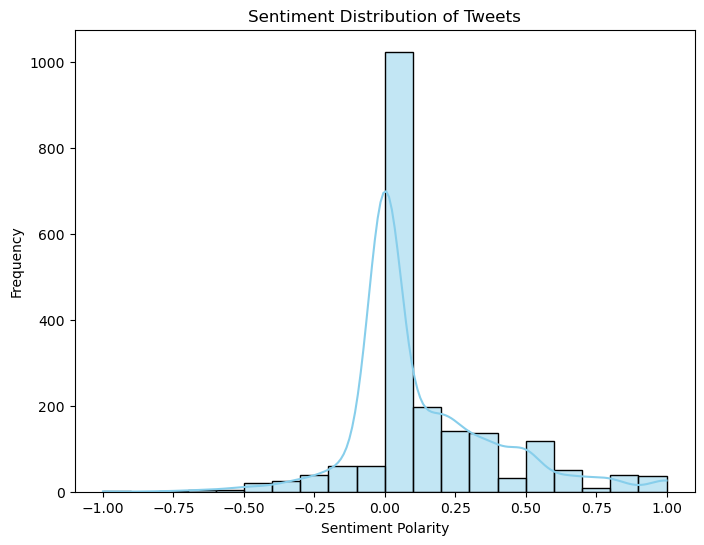

In [96]:
tweet['Sentiment'] = tweet['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 6: Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(tweet['Sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [97]:
tweet.head()

,Text,subjectivity,polarity,Sentiment
0,@kunalb11 I’m an alien,0.750000,-0.250000,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,0.000000,0.000000
2,@joerogan @Spotify Great interview!,0.750000,1.000000,1.000000
3,@gtera27 Doge is underestimated,0.000000,0.000000,0.000000
4,@teslacn Congratulations Tesla China for amazi...,0.366667,0.345313,0.345313


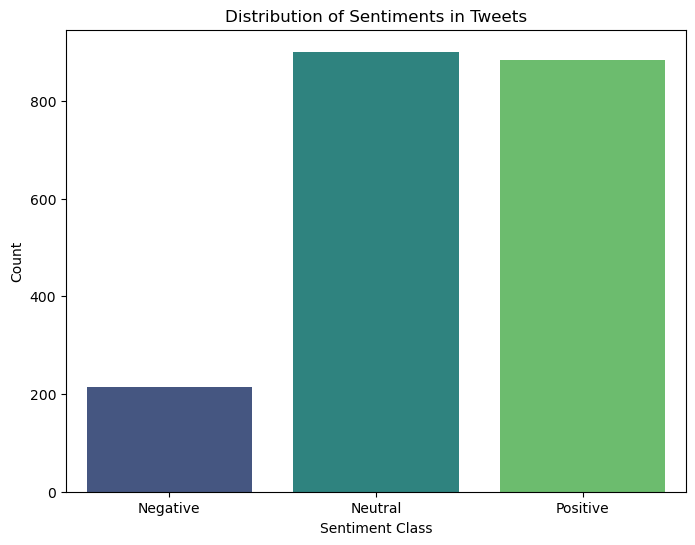

In [98]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

tweet['Sentiment_Class'] = tweet['Sentiment'].apply(classify_sentiment)

# Step 7: Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Class', data=tweet, palette='viridis')
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

In [99]:
tweet.head()

,Text,subjectivity,polarity,Sentiment,Sentiment_Class
0,@kunalb11 I’m an alien,0.750000,-0.250000,-0.250000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,0.000000,0.000000,Neutral
2,@joerogan @Spotify Great interview!,0.750000,1.000000,1.000000,Positive
3,@gtera27 Doge is underestimated,0.000000,0.000000,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,0.366667,0.345313,0.345313,Positive


In [101]:
positive_tweets = tweet[tweet['Sentiment_Class'] == 'Positive']['Text']
negative_tweets = tweet[tweet['Sentiment_Class'] == 'Negative']['Text']

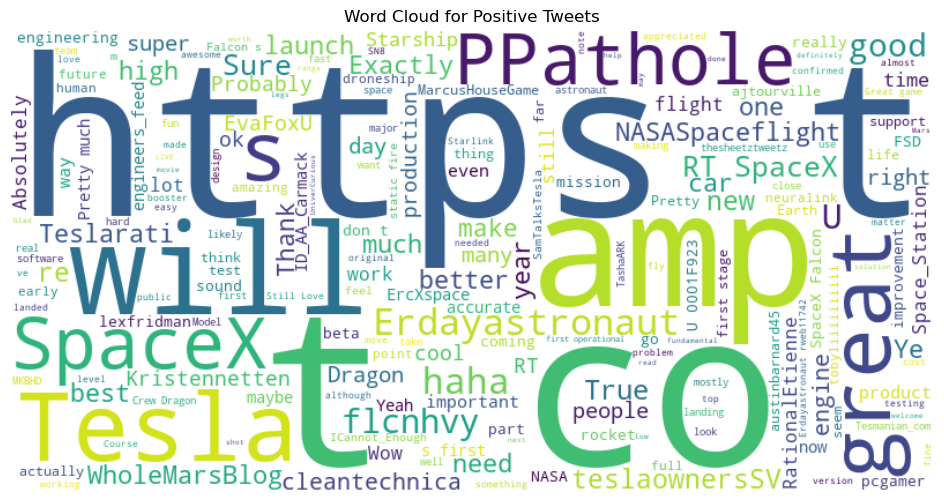

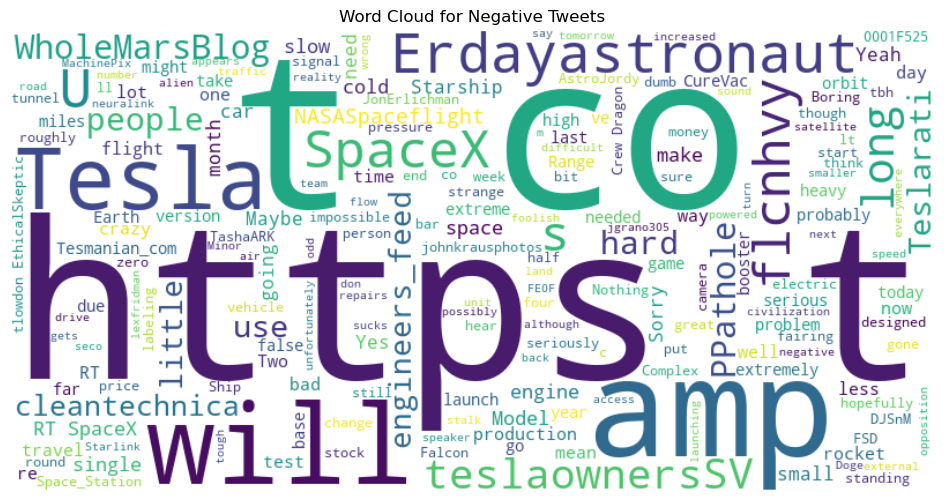

In [102]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(positive_tweets, 'Word Cloud for Positive Tweets')
generate_wordcloud(negative_tweets, 'Word Cloud for Negative Tweets')

# From the above , we can say taht more number of tweets are either positive or neutral and the sentiment analysis on the tweets of Elon musk is we can say positive